In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc


def activity_map(cell):
  return 1 if cell == "A" else 0

# read the data in
df = pd.read_csv("/content/results.csv")
print(df.head())

df["active_decoy"] = df["active_decoy"].apply(activity_map)
fpr, tpr, thresholds =roc_curve(df['active_decoy'], df['affinity_score'].abs())
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

####################################
# The optimal cut off would be where tpr is high and fpr is low
# tpr - (1-fpr) is zero or near to zero is the optimal cut off point
####################################
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
print('####################################')
print(roc.iloc[(roc.tf-0).abs().argsort()[:1]])

  ligand_name  affinity_score active_decoy
0       Lig 3           -10.0            A
1       Lig 6           -10.0            A
2      Lig 15            -9.6            A
3      Lig 20            -9.7            A
4      Lig 13            -9.5            A
Area under the ROC curve : 0.940000
####################################
   fpr  tpr  1-fpr   tf  thresholds
5  0.2  0.8    0.8  0.0         7.3


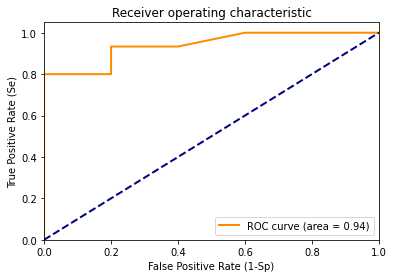

In [ ]:
import matplotlib.pyplot as plt


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Sp)')
plt.ylabel('True Positive Rate (Se)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()